In [2]:
import pandas as pd
import os, sys
import csv
from pathlib2 import Path

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
# PATHS

data_path = '/l/nx/data/deepspace/prisontalk/data/'
forums_path = 'forums/parsed/posts/'

In [7]:
forums = pd.read_csv('~/prisontalk/data/results/forums_timestamped.csv', index_col='date', parse_dates=True, infer_datetime_format=True)

forums.head()

forum_files = get_forum_files(data_path + forums_path, 'csv')

forum_dfs = []

for forum_file in forum_files:
    
    # IN THE FUTURE IT MIGHT BE BETTER TO IMPORT THEM AS STINGS BECAUSE 'TODAY' HAS TO BE REMOVED ANYWAY
    forum_df = pd.read_csv(forum_file, index_col='date')#, parse_dates=['date'], infer_datetime_format=True, index_col='date')
    forum_dfs.append(forum_df)

forums = pd.concat(forum_dfs)

,fid,tid,pg,pid,post_num,user,uid,text
date,,,,,,,,
2008-09-20 16:53:00+00:00,116,362398,1,3988914,1,whisky 23,82186,Bobby woods has been given a date for the 23rd...
2008-09-20 17:02:00+00:00,116,362398,1,3988936,2,JJS811,162116,Prayers offered to Bobby and his family and fr...
2008-10-18 13:06:00+00:00,116,362398,1,4079385,3,whisky 23,82186,has anyone heard any news on Bobbies case
2008-10-18 15:15:00+00:00,116,362398,1,4079552,4,ttopjenn29,50676,saying prayer's for him!
2008-10-18 16:48:00+00:00,116,362398,1,4079695,5,JJS811,162116,DPIC say it is still going ahead.


In [8]:
type(forums.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [20]:
theme_fids = {'general': [39], 'intro': [38], 'pre': [91],
              'inside' : [72, 124, 1506, 126, 1035, 51, 92, 105],
              'death_row' : [66, 375, 116, 114],
              'post' : [52, 206, 372, 53, 208, 209, 207],
              'parent_child' : [75, 1377, 1534, 65, 94],
              'kin': [44, 110, 192, 240, 241],
              'loving': [645, 211, 242, 180, 412],
              'addiction': [202, 584, 583]}

themes = {}

for category, fid_list in theme_fids.items():
    
    theme = forums[forums['fid'].isin(theme_fids[category])] # ISOLATE THEME USING LIST OF FID'S
    themes[category] = theme

In [21]:
for theme, df in themes.items():
    print theme, df.shape[0]

pre 16250
inside 447678
death_row 70631
general 168593
intro 236066
kin 764447
addiction 16471
parent_child 213677
post 413735
loving 310378


In [75]:
by_year = themes['addiction'].groupby('fid').resample('Y').count()['fid']
by_year = by_year.unstack(level=0, fill_value=0)
# by_year.head()

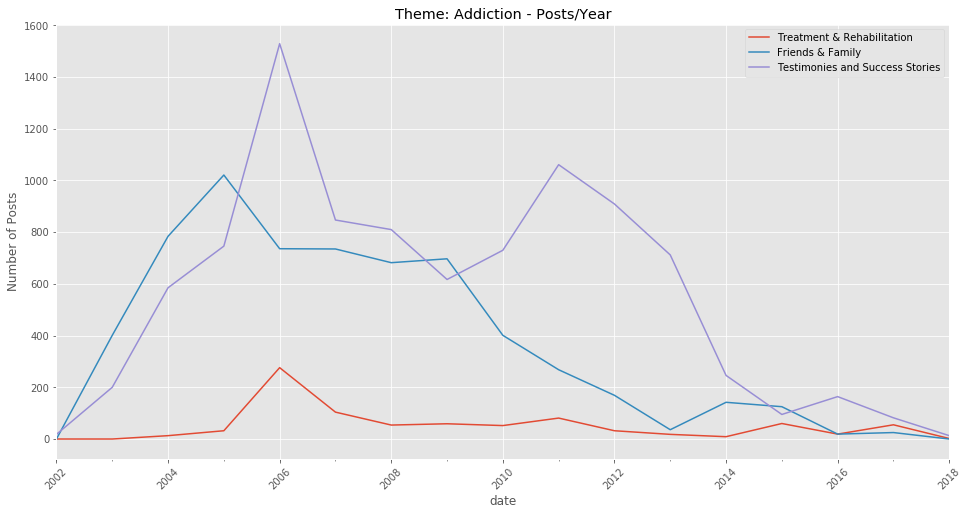

In [71]:
forum_names = ['Treatment & Rehabilitation', 'Friends & Family', 'Testimonies and Success Stories']

by_year.plot(figsize=(16, 8))
plt.title('Theme: Addiction - Posts/Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(forum_names);
plt.show()

In [74]:
kin_by_year = themes['kin'].groupby('fid').resample('Y').count()['fid']
kin_by_year = kin_by_year.unstack(level=0, fill_value=0)
# kin_by_year.head()

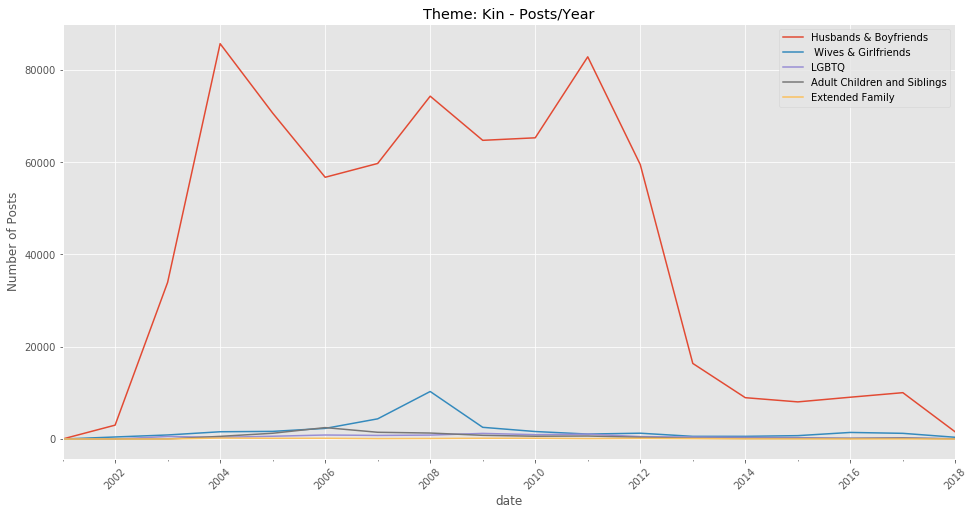

In [76]:
kin_forum_names = ['Husbands & Boyfriends',' Wives & Girlfriends', 'LGBTQ', 'Adult Children and Siblings', 'Extended Family']

kin_by_year.plot(figsize=(16, 8))
plt.title('Theme: Kin - Posts/Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(kin_forum_names);
plt.show()

### FUNCTIONS

In [1]:
def get_forum_files(forum_path, suffix):
    
    forum_path = Path(forum_path)
    all_files = [str(file) for file in forum_path.rglob('*.' + suffix)]
    
    return all_files

In [2]:
def get_forum_id(forum_path):
    
    forum_id = forum_path.split('/')[-1].split('_')[1]

    return forum_id

# forum_path = '/l/nx/data/deepspace/prisontalk/data/fid_583_posts.csv'
# fid = get_forum_id(forum_path)
# fid

In [3]:
def get_forum_ids(forum_paths):
    
    forum_ids = [int(get_forum_id(forum_path)) for forum_path in forum_paths]
    
    return forum_ids


# data_path = '/l/nx/data/deepspace/prisontalk/data/'
# forum_posts_path = 'forums/parsed/posts/'
# forum_files = get_forum_files(data_path + forum_posts_path, 'csv')
# file_fids = get_forum_ids(forum_files)
# print len(file_fids)

In [4]:
def create_fid_to_name_dict(df, key, value):
    
    keys = df[key]
    values = df[value]
    
    return dict(zip(keys, values))

# scraped_ids = pd.read_csv(data_path + 'forums/scraped_ids.csv')
# fid_to_name = create_fid_to_name_dict(scraped_ids, 'fid', 'name')

# for fid, name in fid_to_name.items()[:5]:
#     print fid, name
    
# # 645 Met While Incarcerated
# # 1035 Remembering Those That Passed While In Prison
# # 412 When the Relationship is Over...
# # 928 The Countdown
# # 38 Introduce Yourself!